In [1]:
import os
import json
from collections import defaultdict
from collections import Counter
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
RESULTS = '../results/human_eval_10'

In [25]:
gpt = json.load(open(f'{RESULTS}/result.json'))
jinsu = json.load(open(f'{RESULTS}/jinsu.json'))

In [27]:
jinsu[0]

{'image_1': '/local/scratch/jihyung/comp_imgs/dataset/comp_cars/data/test_image/73/467/2015/e788a609573809.jpg',
 'image_2': '/local/scratch/jihyung/comp_imgs/dataset/comp_cars/data/test_image/73/467/2009/14506ee7ad8b75.jpg',
 'answer': 'Left',
 'question': 'Based on these images, which car is newer in terms of its model year or release year? \nNote that this question refers solely to the year each car was first introduced or manufactured, \nnot its current condition or usage.',
 'final_option': ['Left', 'Right'],
 'human_answer': 'Right'}

# GPT

In [22]:
error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in gpt:
    pair['final_option'] = [i.rstrip().lstrip() for i in pair['final_option']]
    if pair['gpt_answer'] not in pair['final_option']:
        error.append(pair)
    elif pair['answer'] == pair['gpt_answer']:
        correct.append(pair)
    elif pair['answer'] != pair['gpt_answer']:
        wrong.append(pair)
        wrong_pred.append(pair['gpt_answer'])
    else:
        print('fuck')

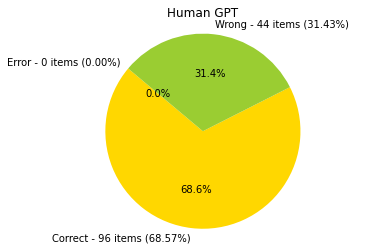

In [24]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Human GPT')
plt.show()

# jinsu

In [35]:
error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in jinsu:
    pair['final_option'] = [i.rstrip().lstrip() for i in pair['final_option']]
    if pair['human_answer']:
        pair['human_answer'] = pair['human_answer'].rstrip().lstrip()
    if pair['human_answer'] not in pair['final_option']:
        error.append(pair)
    elif pair['answer'] == pair['human_answer']:
        correct.append(pair)
    elif pair['answer'] != pair['human_answer']:
        wrong.append(pair)
        wrong_pred.append(pair['human_answer'])
    else:
        print('fuck')

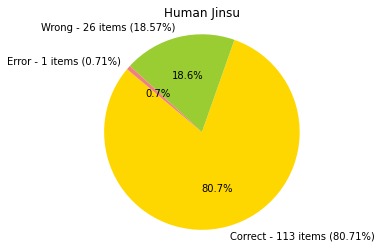

In [36]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Human Jinsu')
plt.show()